In [0]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

In [0]:
(train_x, train_y) , (test_x , test_y) = mnist.load_data()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def draw_image(image):
    plt.figure(figsize=(2,2))
    plt.imshow(image , cmap="gray")
    plt.colorbar()
    plt.grid(False)

In [0]:
train_x , test_x = train_x /255.0 , test_x / 255.0

In [0]:
classes =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
#build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(120 ,activation=tf.nn.relu6),
    keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(10 , activation=keras.activations.softmax),
])

In [31]:
model.compile(optimizer="sgd", loss=keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy" ,])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               94200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 120)               480       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1210      
Total params: 95,890
Trainable params: 95,650
Non-trainable params: 240
_________________________________________________________________


In [0]:
class history_loss(keras.callbacks.Callback):
    def on_train_begin(self , logs ={}):
        self.lossess = []
    def on_batch_end(self , batch , logs):
        self.lossess.append(logs.get("loss"))
#         print(self.lossess)

In [0]:
record = history_loss()

In [34]:
model.fit(train_x , train_y , batch_size=128 , epochs=5 , verbose=1 , validation_split=0.3 , callbacks=[record] )

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 2s 44us/step - loss: 0.6245 - acc: 0.8187 - val_loss: 0.4303 - val_acc: 0.8988
Epoch 2/5
42000/42000 [==============================] - 2s 37us/step - loss: 0.3336 - acc: 0.9060 - val_loss: 0.2955 - val_acc: 0.9182
Epoch 3/5
42000/42000 [==============================] - 2s 37us/step - loss: 0.2731 - acc: 0.9232 - val_loss: 0.2568 - val_acc: 0.9282
Epoch 4/5
42000/42000 [==============================] - 2s 37us/step - loss: 0.2391 - acc: 0.9325 - val_loss: 0.2329 - val_acc: 0.9353
Epoch 5/5
42000/42000 [==============================] - 2s 37us/step - loss: 0.2149 - acc: 0.9404 - val_loss: 0.2152 - val_acc: 0.9407


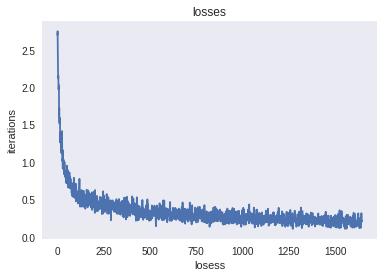

In [35]:
#plot how loss function converges

import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(record.lossess))
plt.plot(x , record.lossess)
plt.title("losses")
plt.xlabel("losess")
plt.ylabel("iterations")
plt.grid(False)
plt.savefig("peter",overwrite=True)

In [36]:
loss , acc = model.evaluate(test_x , test_y ,use_multiprocessing=False )
acc

10000/10000 [==============================] - 0s 29us/step


0.9449

In [0]:
predictions = model.predict(test_x)

In [0]:
#save the model
model.save("mnists_data.h5" , overwrite=True)

In [0]:
import numpy as np
preds = np.argmax(predictions , axis=1)

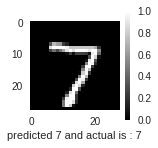

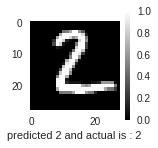

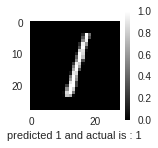

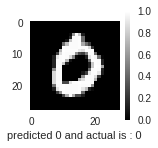

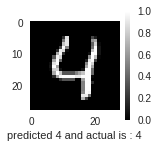

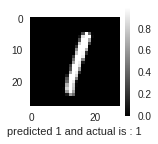

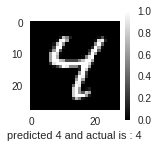

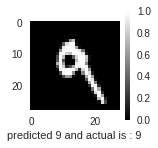

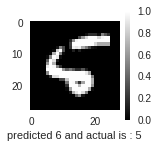

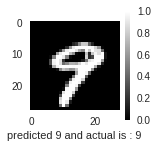

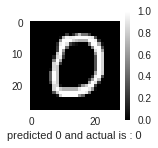

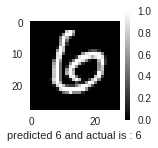

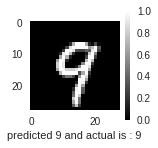

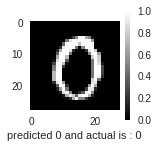

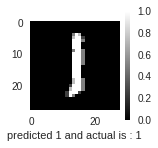

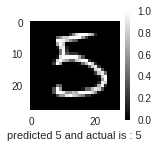

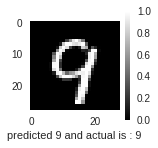

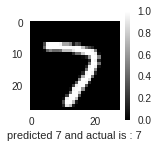

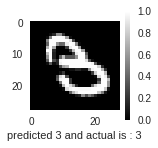

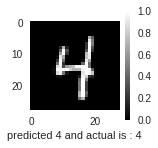

In [40]:
#print first ten predictions
for _ in range(20):
    p = preds[_]
    a = test_y[_]
    if(p == a):
        textColor  = 'r'
    else:
        textColor = 'o'
    draw_image(test_x[_])
    plt.xlabel("predicted {} and actual is : {}".format(p , a))